<a href="https://colab.research.google.com/github/MohammadNPak/MFTDjango04/blob/master/ExteraHW_Result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
from HodaDatasetReader import read_hoda_dataset
import random
import numpy as np
import pandas as pd
import sklearn
from tensorflow import keras
from matplotlib import pyplot as plt
random.seed(0)
np.random.seed(0)
%matplotlib inline

X_test,Y_test = read_hoda_dataset('/content/drive/MyDrive/NNDL/HWExtera/Q3/HODA/Test 20000.cdb',
    images_height=40,
    images_width=40,
    one_hot=True,
    reshape=False)


model_adam  = keras.models.load_model('/content/drive/MyDrive/NNDL/HWExtera/Q3/model_adam')
model_adadelta = keras.models.load_model('/content/drive/MyDrive/NNDL/HWExtera/Q3/model_adadelta')
model_momentum = keras.models.load_model('/content/drive/MyDrive/NNDL/HWExtera/Q3/model_momentum (1)')

result_adam = pd.read_csv('/content/drive/MyDrive/NNDL/HWExtera/Q3/result_adam.csv')
result_adadelta = pd.read_csv('/content/drive/MyDrive/NNDL/HWExtera/Q3/result_adadelta.csv')
result_momentum = pd.read_csv('/content/drive/MyDrive/NNDL/HWExtera/Q3/result_momentum.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                100 non-null    int64  
 1   loss                      100 non-null    float64
 2   categorical_accuracy      100 non-null    float64
 3   true_positives_6          100 non-null    float64
 4   true_negatives_6          100 non-null    float64
 5   false_positives_6         100 non-null    float64
 6   false_negatives_6         100 non-null    float64
 7   precision_6               100 non-null    float64
 8   recall_6                  100 non-null    float64
 9   val_loss                  100 non-null    float64
 10  val_categorical_accuracy  100 non-null    float64
 11  val_true_positives_6      100 non-null    float64
 12  val_true_negatives_6      100 non-null    float64
 13  val_false_positives_6     100 non-null    float64
 14  val_false_n

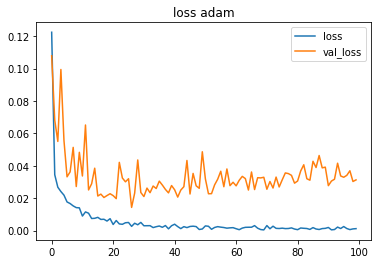

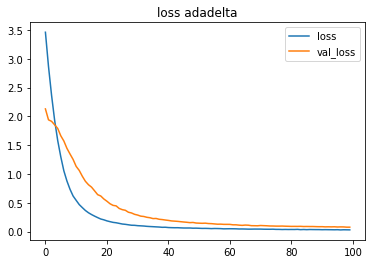

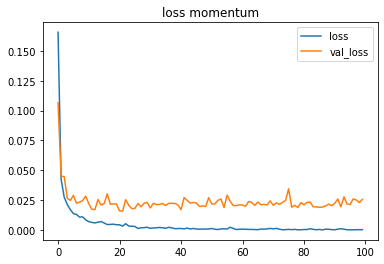

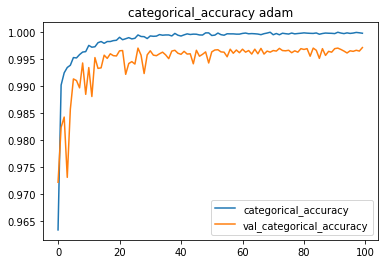

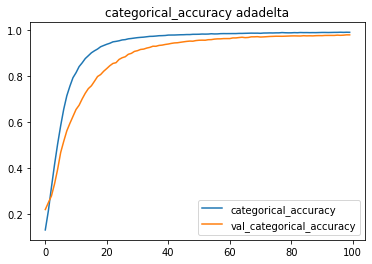

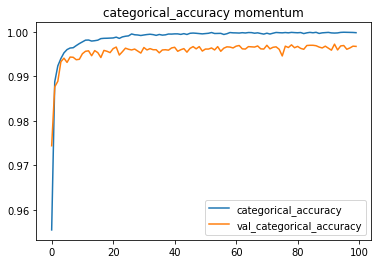

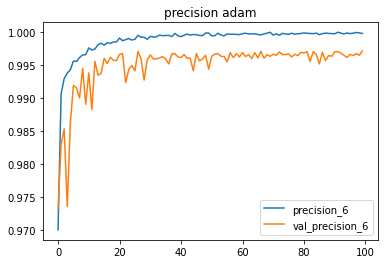

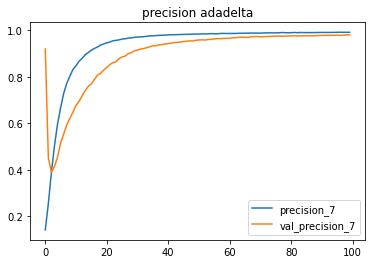

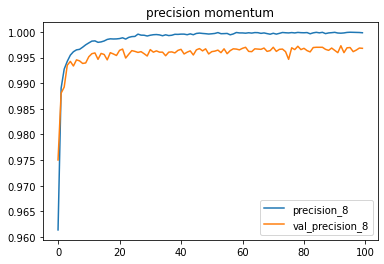

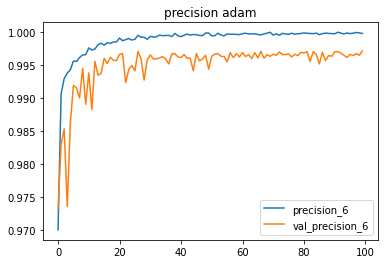

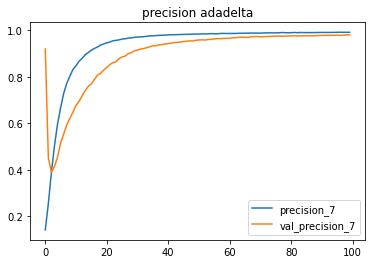

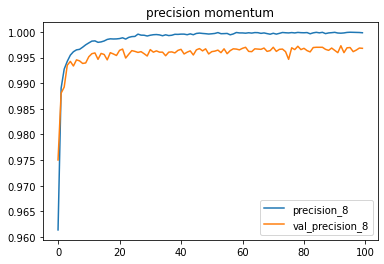

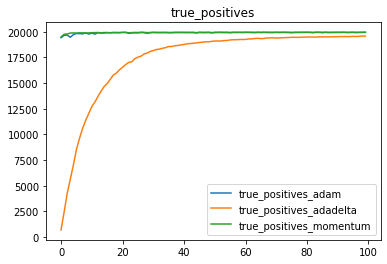

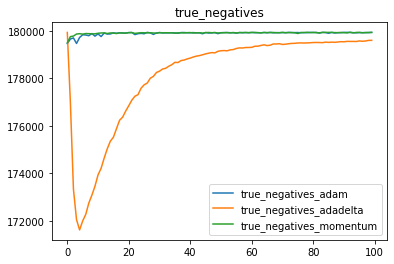

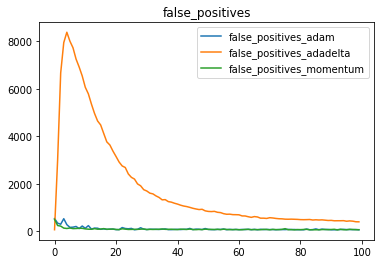

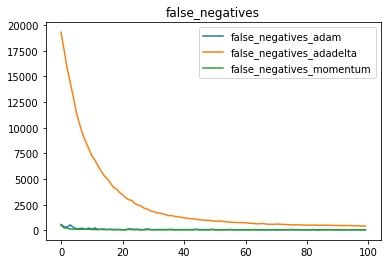

In [42]:
from matplotlib import pyplot as ptl
# fig,ax= ptl.subplots(3,1)
result_adam.info()
result_adadelta.info()
result_momentum.info()

result_adam.plot(y=['loss','val_loss'],title='loss adam')
result_adadelta.plot(y=['loss','val_loss'],title='loss adadelta')
result_momentum.plot(y=['loss','val_loss'],title='loss momentum')

result_adam.plot(y=['categorical_accuracy','val_categorical_accuracy'],title='categorical_accuracy adam')
result_adadelta.plot(y=['categorical_accuracy','val_categorical_accuracy'],title='categorical_accuracy adadelta')
result_momentum.plot(y=['categorical_accuracy','val_categorical_accuracy'],title='categorical_accuracy momentum')

result_adam.plot(y=['precision_6','val_precision_6'],title='precision adam')
result_adadelta.plot(y=['precision_7','val_precision_7'],title='precision adadelta')
result_momentum.plot(y=['precision_8','val_precision_8'],title='precision momentum')

result_adam.plot(y=['precision_6','val_precision_6'],title='precision adam')
result_adadelta.plot(y=['precision_7','val_precision_7'],title='precision adadelta')
result_momentum.plot(y=['precision_8','val_precision_8'],title='precision momentum')

pd.DataFrame(data={'true_positives_adam':result_adam['val_true_positives_6'],
    'true_positives_adadelta':result_adadelta['val_true_positives_7'],
    'true_positives_momentum':result_momentum['val_true_positives_8']}
    ).plot(title='true_positives')

pd.DataFrame(data={'true_negatives_adam':result_adam['val_true_negatives_6'],
    'true_negatives_adadelta':result_adadelta['val_true_negatives_7'],
    'true_negatives_momentum':result_momentum['val_true_negatives_8']}
    ).plot(title='true_negatives')

pd.DataFrame(data={'false_positives_adam':result_adam['val_false_positives_6'],
    'false_positives_adadelta':result_adadelta['val_false_positives_7'],
    'false_positives_momentum':result_momentum['val_false_positives_8']}
    ).plot(title='false_positives')

pd.DataFrame(data={'false_negatives_adam':result_adam['val_false_negatives_6'],
    'false_negatives_adadelta':result_adadelta['val_false_negatives_7'],
    'false_negatives_momentum':result_momentum['val_false_negatives_8']}
    ).plot(title='false_negatives')


In [43]:
y_adam = model_adam.predict(X_test)
y_adadelta = model_adadelta.predict(X_test)
y_momentum = model_momentum.predict(X_test)

625/625 [==============================] - 3s 5ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       0.99      1.00      0.99      2000
           3       0.99      1.00      0.99      2000
           4       1.00      1.00      1.00      2000
           5       1.00      1.00      1.00      2000
           6       1.00      1.00      1.00      2000
           7       1.00      1.00      1.00      2000
           8       1.00      1.00      1.00      2000
           9       1.00      1.00      1.00      2000

    accuracy                           1.00     20000
   macro avg       1.00      1.00      1.00     20000
weighted avg       1.00      1.00      1.00     20000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2000
           1       1.00      1.00      1.00      2000
           2       0.99      1.00      0.99      2000
           3       0.99 

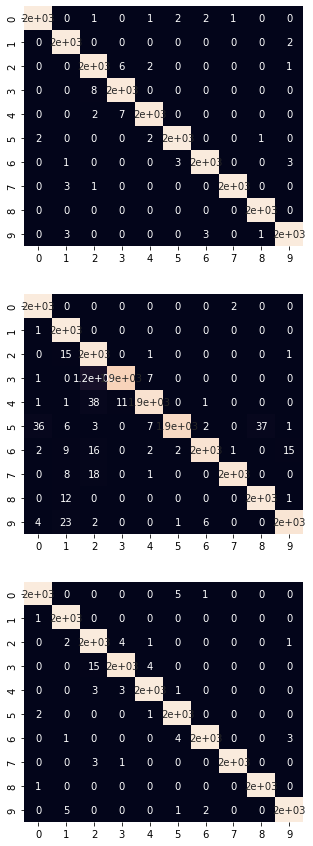

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import f1_score, classification_report

matrix_adam = confusion_matrix(Y_test.argmax(axis=1),y_adam.argmax(axis=1))
matrix_adadelta = confusion_matrix(Y_test.argmax(axis=1),y_adadelta.argmax(axis=1))
matrix_momentum = confusion_matrix(Y_test.argmax(axis=1),y_momentum.argmax(axis=1))

fig,ax = plt.subplots(3,1,figsize=(5, 15))
sns.heatmap(matrix_adam,annot=True,cbar=False,ax=ax[0])
sns.heatmap(matrix_adadelta,annot=True,cbar=False,ax=ax[1])
sns.heatmap(matrix_momentum,annot=True,cbar=False,ax=ax[2])

classification_report_adam = classification_report(Y_test.argmax(axis=1),y_adam.argmax(axis=1))
classification_report_adadelta = classification_report(Y_test.argmax(axis=1),y_adam.argmax(axis=1))
classification_report_momentum = classification_report(Y_test.argmax(axis=1),y_adam.argmax(axis=1))
print(classification_report_adam)
print(classification_report_adadelta)
print(classification_report_momentum)

In [ ]:
from sklearn.metrics import f1_score, classification_report

classification_report(Y_test.argmax(axis=1),y_adam.argmax(axis=1))
classification_report(Y_test.argmax(axis=1),y_adam.argmax(axis=1))
classification_report(Y_test.argmax(axis=1),y_adam.argmax(axis=1))